# Day 51 – Principal Component Analysis (PCA) in Machine Learning

## Introduction  

In this notebook (Day51), I learned about **Principal Component Analysis (PCA)**, which is used for dimensionality reduction.  

After preprocessing the dataset, I applied PCA to transform the features into principal components.  

Then, I trained a **Logistic Regression model** on this reduced dataset and evaluated its performance.  

This helped me understand how PCA works in practice and how it can be combined with classification models.  

---


## Principal Component Analysis (PCA)

### What is PCA?

Principal Component Analysis (PCA) is a **dimensionality reduction technique** used in machine learning and data analysis.
It transforms a dataset with many features into a smaller set of **new features (called principal components)** while retaining most of the important information (variance).

Example analogy: Imagine you have a 3D ball of points. PCA projects it onto a 2D plane in such a way that the spread (variance) is maximized. You lose one dimension, but keep most of the useful information.

---

### Why Use PCA?

* **Reduce dimensionality** – fewer features while keeping most of the data’s variance.
* **Remove redundancy** – correlated features are combined.
* **Improve model performance** – helps avoid the **curse of dimensionality** and reduces overfitting.
* **Faster computation** – fewer features → less training time.
* **Better visualization** – high-dimensional data can be represented in 2D or 3D.

---

### How PCA Works (Step by Step)

1. **Standardize the data** (important because PCA is sensitive to scale).
2. **Compute the covariance matrix** of the dataset.
3. **Calculate eigenvalues and eigenvectors** of the covariance matrix.

   * Eigenvectors = directions of new feature space (principal components).
   * Eigenvalues = amount of variance each component explains.
4. **Sort eigenvalues** and select the top `k` principal components.
5. **Project the original data** onto the new `k` components → transformed dataset.

---

### Choosing the Number of Components

* PCA provides **explained variance ratio** for each component.
* The cumulative variance plot helps decide how many components to keep.
* Example: If the first 2 components explain 95% of variance, we can reduce from 10 features → 2 features.

---

### PCA with Logistic Regression

* After dimensionality reduction, we can apply **Logistic Regression** on the transformed dataset.
* Benefits:

  * Reduces noise and multicollinearity.
  * Speeds up training.
  * Sometimes improves generalization.
* Important to note: PCA is **unsupervised** → it does not consider target labels when creating components.

---

### Limitations of PCA

* Harder to interpret the new features (since they are linear combinations of original ones).
* Scaling is mandatory.
* Might lose small but useful signals if too many dimensions are removed.


### Key Intuition

* PCA **rotates and compresses** the feature space into fewer dimensions.
* The goal is to keep as much variance (information) as possible while reducing complexity.

---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\adult.csv")

## Exploratory Data Analysis

In [3]:
df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. 

So, I will encode `?` as NaN values.

## Encode ? as NaNs

In [6]:
df[df == '?'] = np.nan

## Again check the summary of dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Now, the summary shows that the variables - workclass, occupation and native.country contain missing values.

All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

## Impute missing values with mode

In [9]:
for col in ['workclass','occupation','native.country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

## Check again for missing values

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now we can see that there are no missing values in the dataset.

In [11]:
df.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Split into feature (X) and target (y)

In [12]:
X = df.drop(['income'], axis=1)

y = df['income']

In [13]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


## Split data into separate training and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Engineering

### Encode categorical variables

In [15]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

## Feature Scaling

In [16]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [17]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


## Logistic Regression model with all features

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8218


## Logistic Regression with PCA

Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, I will explain another important concept called explained variance ratio.


### Explained Variance Ratio

A very useful piece of information is the **explained variance ratio** of each principal component. It is available via the `explained_variance_ratio_ ` variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation.

## PCA implementation

In [19]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

### Comment

- We can see that approximately 97.25% of variance is explained by the first 13 variables. 

- Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information. 

- So, I will drop it, train the model again and calculate the accuracy. 


## Logistic Regression with first 13 features

In [20]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8213


### Comment

- We can see that accuracy has been decreased from 0.8218 to 0.8213 after dropping the last feature.

- Now, if I take the last two features combined, then we can see that approximately 7% of variance is explained by them.

- I will drop them, train the model again and calculate the accuracy.

## Logistic Regression with first 12 features

In [21]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.8227


### Comment

- Now, it can be seen that the accuracy has been increased to 0.8227, if the model is trained with 12 features.

- Lastly, I will take the last three features combined. Approximately 11.83% of variance is explained by them.

- I will repeat the process, drop these features, train the model again and calculate the accuracy.

## Logistic Regression with first 11 features

In [22]:
X = df.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 11 features: 0.8186


### Comment

- We can see that accuracy has significantly decreased to 0.8187 if I drop the last three features.

- Our aim is to maximize the accuracy. We get maximum accuracy with the first 12 features and the accuracy is 0.8227.


## Select right number of dimensions

- The above process works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [23]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


### Comment

- With the required number of dimensions found, we can then set number of dimensions to `dim` and run PCA again.

- With the number of dimensions set to `dim`, we can then calculate the required accuracy.

## Plot explained variance ratio with number of dimensions

- An alternative option is to plot the explained variance as a function of the number of dimensions.

- In the plot, we should look for an elbow where the explained variance stops growing fast.

- This can be thought of as the intrinsic dimensionality of the dataset.

- Now, I will plot cumulative explained variance ratio with number of components to show how variance ratio varies with number of components.

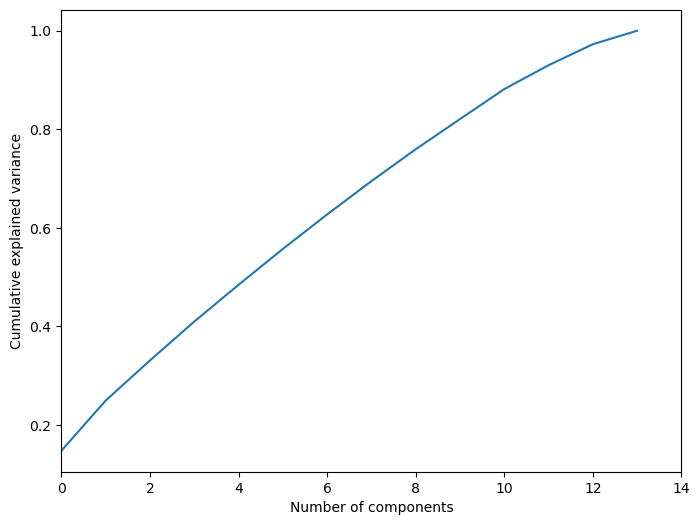

In [24]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Comment

The above plot shows that almost 90% of variance is explained by the first 12 components.

---

## Summary and Key Takeaways

- In this notebook, I learned about **Principal Component Analysis (PCA)** – the most popular dimensionality reduction technique.  
- PCA projects the data into a lower-dimensional space while preserving as much variance as possible.  
- After applying PCA on the **Adult dataset**, I trained a **Logistic Regression model** on the transformed data.  
- The maximum accuracy was achieved using the **first 12 principal components**, giving an accuracy of **0.8227**.  
- The explained variance analysis showed that around **90% of the variance is captured by the first 12 components**.  
- The explained variance ratio plot confirmed that retaining 12 dimensions balances variance preservation with dimensionality reduction.  
- **Benefits of PCA**: reduces redundancy, speeds up computation, helps with overfitting.  
- **Limitations of PCA**: transformed features are harder to interpret, and scaling is mandatory.  

Overall, PCA proved effective in reducing the dataset’s dimensionality while maintaining strong model performance with Logistic Regression.  